In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [2]:
def clean_columns(column_list:list)->list:
  """Removes empty spaces from column names to improve readability

  Args:
      Takes in a column list and returns a cleaned version
  """
  
  return [col.replace(" ","_").lower() for col in column_list]

In [3]:

df = pd.read_csv("ecommerce.csv")
df.columns = clean_columns(df.columns)
df["total_amount_spent"] = df["yearly_amount_spent"] * df["length_of_membership"]
df["total_time_spent"] = df["time_on_app"] + df["time_on_website"]

In [4]:
df

,email,address,avatar,avg._session_length,time_on_app,time_on_website,length_of_membership,yearly_amount_spent,total_amount_spent,total_time_spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054,2400.381104,52.233319
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,1044.847349,48.378420
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,2001.159797,48.440875
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,1815.483339,50.438796
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,2665.144293,50.331842
...,...,...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438,2149.961301,49.984144
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004,1892.157474,48.886004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145,2735.078570,49.831985
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510,1066.534012,49.231509


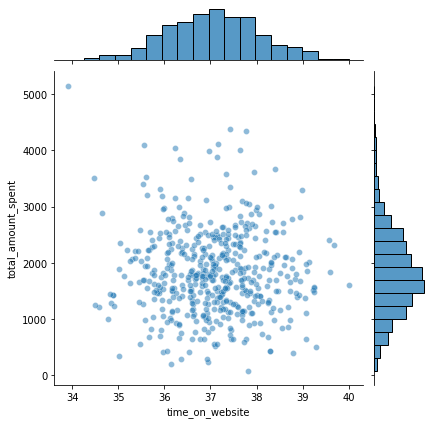

In [5]:
sns.jointplot(x="time_on_website", y="total_amount_spent", data =df, alpha=0.5)


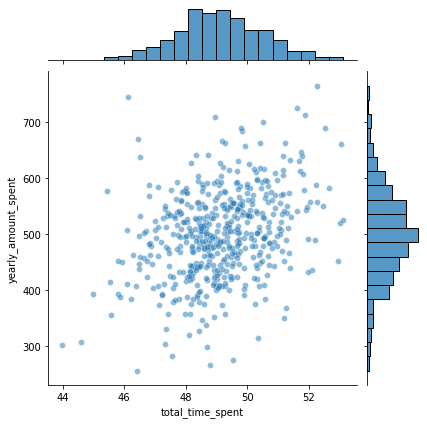

In [6]:
sns.jointplot(x="total_time_spent", y="yearly_amount_spent", data =df, alpha=0.5)

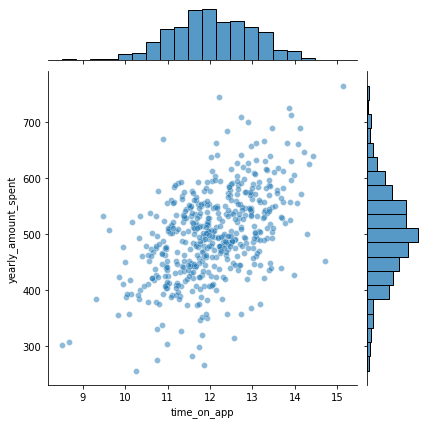

In [7]:
sns.jointplot(x="time_on_app", y="yearly_amount_spent", data =df, alpha=0.5)

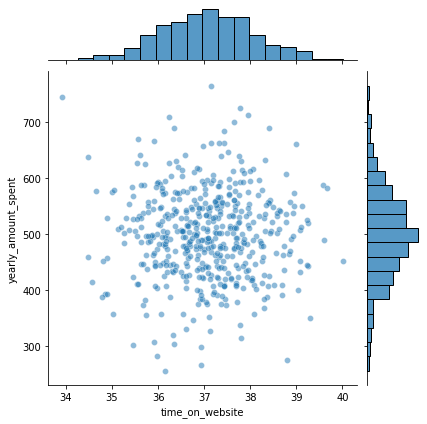

In [8]:
sns.jointplot(x="time_on_website", y="yearly_amount_spent", data =df, alpha=0.5)

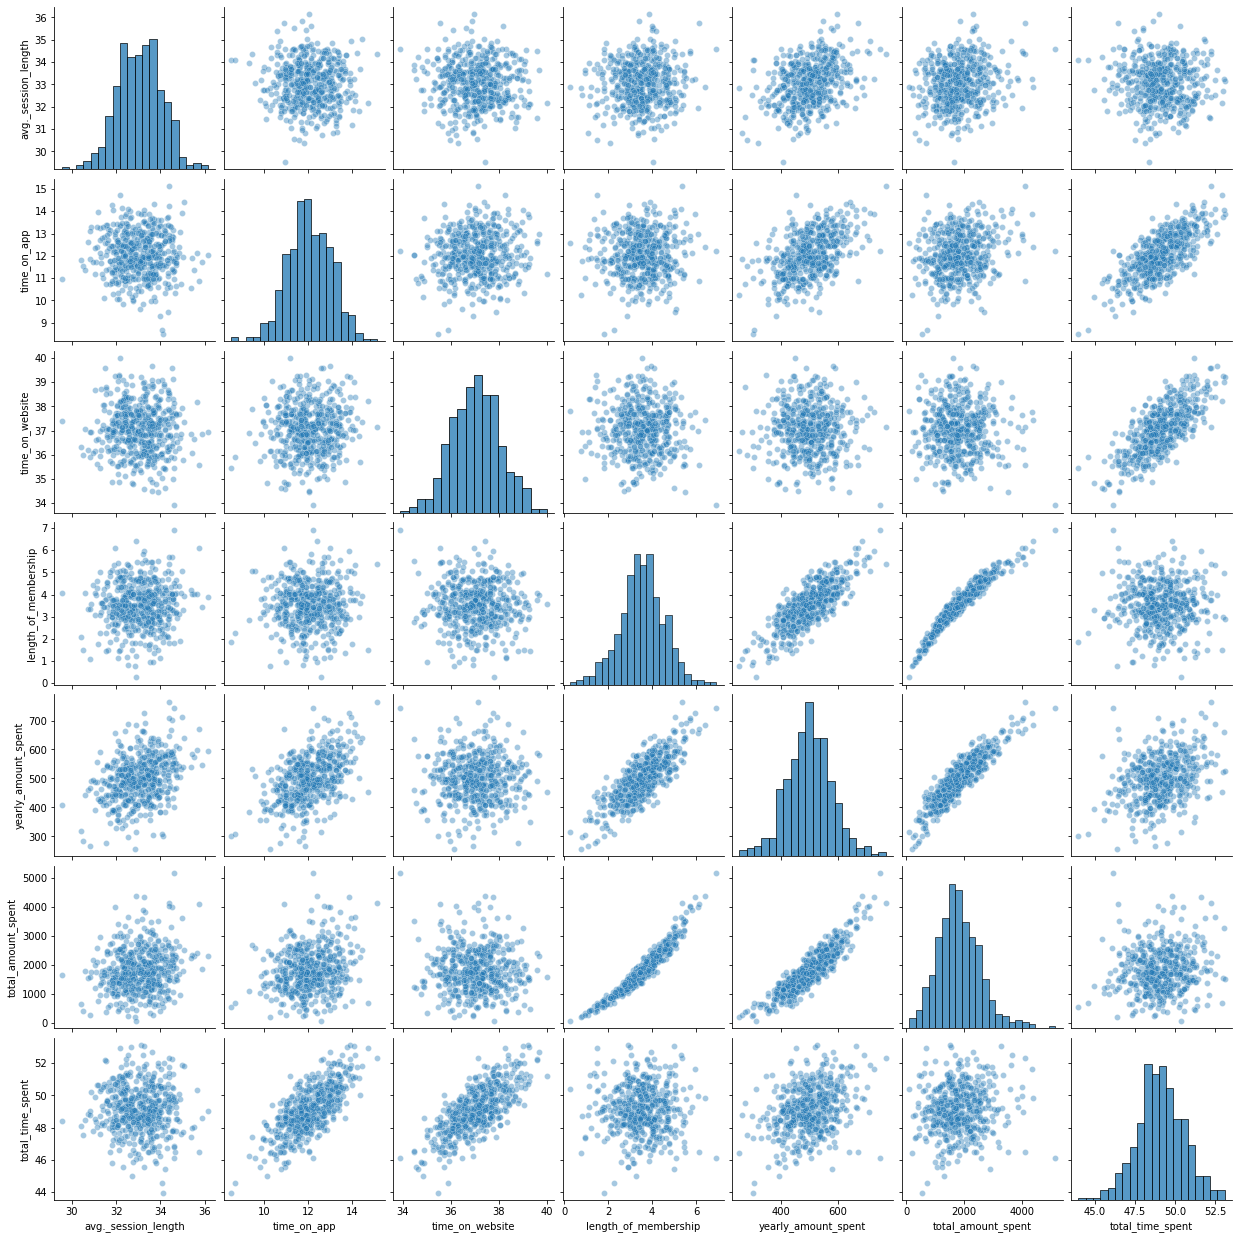

In [9]:
sns.pairplot(df, kind="scatter", plot_kws={"alpha":0.4})

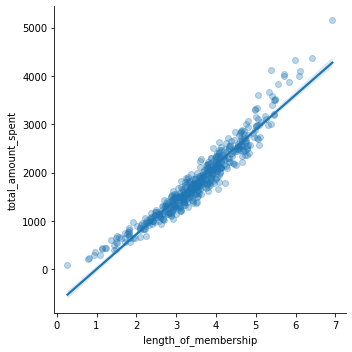

In [10]:
sns.lmplot(x="length_of_membership", y="total_amount_spent", data=df, scatter_kws ={"alpha":0.3})

In [11]:
X, y = df[["total_time_spent","length_of_membership","avg._session_length"]], df["total_amount_spent"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [12]:
linear_regression = LinearRegression()

In [13]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [14]:
linear_regression.score(X_test, y_test)

0.9574431490322646

In [15]:
linear_regression.coef_

array([ 61.76232951, 720.63927268,  97.30339362])

In [16]:
cdf = pd.DataFrame(linear_regression.coef_, X.columns, columns =["coefs"])
cdf


,coefs
total_time_spent,61.762330
length_of_membership,720.639273
avg._session_length,97.303394


In [19]:
predictions = linear_regression.predict(X_test)
predictions

array([1688.3780379 , 2088.17774028, 2129.1908318 , 1449.69279421,
       1597.29234503, 2144.26208699, 1783.38905065, 2063.73509129,
       1225.59561111, 2010.7740999 , 1480.85489265, 1191.49836804,
        910.79320146, 2453.56848999, 1403.06835539, 1225.89540629,
       2062.61422162, 1476.38718942, 1190.28713859, 1956.30322879,
       1741.36383486, 1863.14603997, 1557.8039108 , 2934.11326541,
       1327.33066134, 2017.60858235, 2868.91405654, 2196.60158921,
       1223.21441905,  502.17281379, 2364.42388385, 1833.92020722,
       1843.36796264, -208.66667019, 2202.22963019, 1559.72022476,
       2207.16014314, 1116.74665056, 1574.33234927, 1723.94892917,
       1823.23265568,  477.48232056, 1772.69576983, 1864.50258282,
       1468.82884785, 2410.66263813, 2566.26174321, 2020.01334649,
        197.28669234,  946.07974325, 1650.64166908, 1465.17718945,
       2916.60010264, 2775.67463558, 2332.6048105 , 1679.90651828,
        579.97290343,  537.20178004, 2570.62730808, 2447.00999

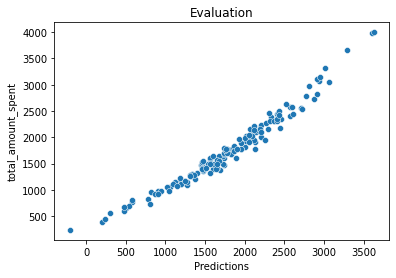

<Figure size 1152x864 with 0 Axes>

In [23]:
sns.scatterplot(x=predictions, y=y_test)
plt.xlabel("Predictions")
plt.title("Evaluation")
plt.figure(figsize=(16, 12))
plt.show()

In [21]:
print("Mean Absolute Error: ", mean_absolute_error(y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(y_test, predictions))
print("RMSE: ", math.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error:  107.87329592192359
Mean Squared Error:  19798.977681323944
RMSE:  140.70884009657652


<ipython-input-25-987c3b2f83af>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=20, kde=True)


<Axes: xlabel='total_amount_spent', ylabel='Density'>

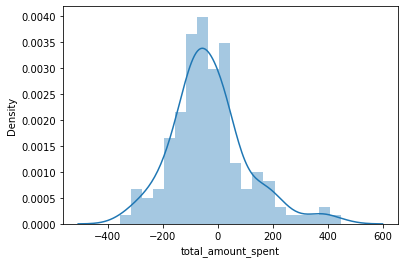

In [25]:
residuals = y_test - predictions

sns.distplot(residuals, bins=20, kde=True)